In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)

city_data="data/city_data.csv"
ride_data="data/ride_data.csv"

# Read the City and Ride Data

city_data= pd.read_csv(city_data)
ride_data= pd.read_csv(ride_data)

# Combine the data into a single dataset

merged_data = pd.merge(city_data, ride_data, how="outer", on=["city"])

# Display the data table for preview

merged_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


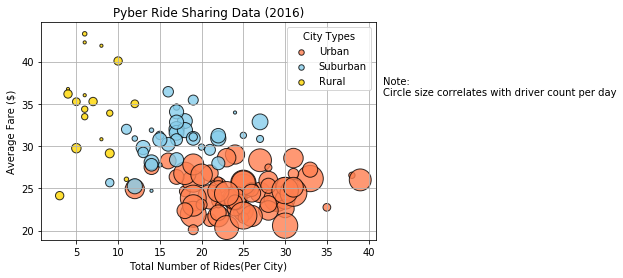

In [2]:
# Obtain the x and y coordinates for each of the three city types

#subsets based on types
urban_df = merged_data.loc[merged_data["type"] == "Urban",:]
suburban_df = merged_data.loc[merged_data["type"] == "Suburban",:]
rural_df = merged_data.loc[merged_data["type"] == "Rural",:]

#Urban Values
urban_city=urban_df.groupby("city") 
urban_average_fare = urban_city["fare"].mean()
urban_rides_per_city = urban_city["date"].count()
urban_driver_count = (urban_city["driver_count"].max())*10

#Suburban Values
suburban_city= suburban_df.groupby("city") 
suburban_average_fare = suburban_city["fare"].mean()
suburban_rides_per_city = suburban_city["date"].count()
suburban_driver_count = (suburban_city["driver_count"].max())*10

#Rural Values
rural_city=rural_df.groupby("city") 
rural_average_fare = rural_city["fare"].mean()
rural_rides_per_city = rural_city["date"].count()
rural_driver_count = (rural_city["driver_count"].max())*10

# Build the scatter plots for each city types

urban_scatter=plt.scatter(urban_rides_per_city, urban_average_fare, marker="o", c="coral", label="Urban", s=urban_driver_count, edgecolors="black", alpha=0.80)
suburban_scatter= plt.scatter(suburban_rides_per_city, suburban_average_fare, marker="o", c="skyblue", label="Suburban", edgecolors="black",s=suburban_driver_count, alpha=0.80)
rural_scatter= plt.scatter(rural_rides_per_city, rural_average_fare, marker="o", c="gold", label="Rural", edgecolors="black",s=rural_driver_count, alpha=0.80)
# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
# Create a legend

legend = plt.legend(loc="upper right",title="City Types", numpoints=1, fontsize=10)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size

plt.text(41.75, 36, 'Note:\nCircle size correlates with driver count per day', fontsize=10)
# Save Figure
plt.savefig("../Images/Pyber_scatter_plot.png",bbox_inches = "tight")

## Bubble Plot of Ride Sharing Data

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

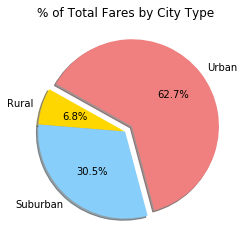

In [5]:
# Calculate Type Percents
urban_total_fare=urban_df["fare"].sum()
suburban_total_fare=suburban_df["fare"].sum()
rural_total_fare=rural_df["fare"].sum()
# Build Pie Chart

city_types = ["Urban","Rural","Suburban"]
total_fares = [urban_total_fare, rural_total_fare, suburban_total_fare]
colors = ["lightcoral","gold","lightskyblue","gold"]
explode=(0.1,0,0)

plt.pie(total_fares, explode=explode, labels=city_types, colors=colors,shadow=True, startangle=285,autopct="%1.1f%%")
plt.title('% of Total Fares by City Type')
# Save Figure
plt.savefig("../Images/Pyber_fare_pie.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

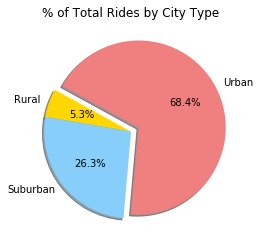

In [7]:
# Calculate Ride Percents

urban_total_rides=urban_df["ride_id"].count()
suburban_total_rides=suburban_df["ride_id"].count()
rural_total_rides=rural_df["ride_id"].count()

# Build Pie Chart

total_rides = [urban_total_rides, rural_total_rides, suburban_total_rides]
plt.pie(total_rides, explode=explode, labels=city_types, colors=colors,shadow=True, startangle=265,autopct="%1.1f%%")
plt.title('% of Total Rides by City Type')

# Save Figure

plt.savefig("../Images/Pyber_rides_pie.png")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

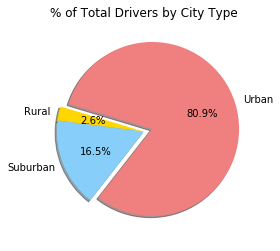

In [9]:
# Calculate Driver Percents
urban_total_drivers = urban_driver_count.sum()
suburban_total_drivers = suburban_driver_count.sum()
rural_total_drivers = rural_driver_count.sum()

# Build Pie Charts
total_drivers = [urban_total_drivers, rural_total_drivers, suburban_total_drivers]
plt.pie(total_drivers, explode=explode, labels=city_types, colors=colors,shadow=True, startangle=232,autopct="%1.1f%%")
plt.title('% of Total Drivers by City Type')
# Save Figure
plt.savefig("../Images/Pyber_drivers_pie.png")

In [10]:
# Show Figure
plt.show()